## 4.1 Import the csv file of the stock which contained the Bollinger columns as well.

  ***Create a new column 'Call' , whose entries are -
    'Buy' if the stock price is below the lower Bollinger band
    'Hold Buy/ Liquidate Short' if the stock price is between the lower and middle Bollinger band
    'Hold Short/ Liquidate Buy' if the stock price is between the middle and upper Bollinger band
    'Short' if the stock price is above the upper Bollinger band**
    
    
  ***Now train a classification model with the 3 bollinger columns and the stock price as inputs and 'Calls' as output. Check the accuracy on a test set. (There are many classifier models to choose from, try each one out and compare the accuracy for each)***
    
    
   ***Import another stock data and create the bollinger columns. Using the already defined model, predict the daily calls for this new stock.***



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [2]:
df = pd.read_csv('week3.csv')
#df.shape
df.head()

,Date,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Day_Perc_Change,Trend,Rolling_14,Std_14,Upper_band,Lower_band
0,2017-05-16,AXISBANK,EQ,500.1,502.10,504.50,493.50,502.05,501.5,499.85,...,4.303938e+09,101028,4027982,46.78,0.279944,Slight or No change,NaN,NaN,NaN,NaN
1,2017-05-17,AXISBANK,EQ,501.5,501.35,506.75,498.50,502.00,502.8,502.88,...,3.240154e+09,84189,2876528,44.64,0.259222,Slight or No change,NaN,NaN,NaN,NaN
2,2017-05-18,AXISBANK,EQ,502.8,498.00,499.10,490.25,492.85,492.0,494.96,...,4.566993e+09,95624,5348691,57.97,-2.147971,Negative,NaN,NaN,NaN,NaN
3,2017-05-19,AXISBANK,EQ,492.0,495.75,503.85,494.20,501.90,501.7,499.10,...,3.798900e+09,72985,4190505,55.06,1.971545,Positive,NaN,NaN,NaN,NaN
4,2017-05-22,AXISBANK,EQ,501.7,504.00,507.45,499.50,502.00,502.3,503.00,...,2.500383e+09,62027,2665857,53.63,0.119593,Slight or No change,NaN,NaN,NaN,NaN


In [3]:
df.rename(columns ={'Rolling_14':'Middle_band'}, inplace =True)
df

,Date,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Day_Perc_Change,Trend,Middle_band,Std_14,Upper_band,Lower_band
0,2017-05-16,AXISBANK,EQ,500.10,502.10,504.50,493.50,502.05,501.50,499.85,...,4.303938e+09,101028,4027982,46.78,0.279944,Slight or No change,NaN,NaN,NaN,NaN
1,2017-05-17,AXISBANK,EQ,501.50,501.35,506.75,498.50,502.00,502.80,502.88,...,3.240154e+09,84189,2876528,44.64,0.259222,Slight or No change,NaN,NaN,NaN,NaN
2,2017-05-18,AXISBANK,EQ,502.80,498.00,499.10,490.25,492.85,492.00,494.96,...,4.566993e+09,95624,5348691,57.97,-2.147971,Negative,NaN,NaN,NaN,NaN
3,2017-05-19,AXISBANK,EQ,492.00,495.75,503.85,494.20,501.90,501.70,499.10,...,3.798900e+09,72985,4190505,55.06,1.971545,Positive,NaN,NaN,NaN,NaN
4,2017-05-22,AXISBANK,EQ,501.70,504.00,507.45,499.50,502.00,502.30,503.00,...,2.500383e+09,62027,2665857,53.63,0.119593,Slight or No change,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,2019-05-07,AXISBANK,EQ,747.45,751.85,755.50,740.00,744.85,741.85,748.48,...,3.796226e+09,141094,2404026,47.40,-0.749214,Slight negative,756.978571,9.724290,776.427151,737.529992
489,2019-05-08,AXISBANK,EQ,741.85,741.90,744.75,733.35,735.10,735.50,737.58,...,4.971211e+09,118950,3373685,50.06,-0.855968,Slight negative,754.917857,11.013429,776.944715,732.890999
490,2019-05-09,AXISBANK,EQ,735.50,733.90,740.50,729.40,732.35,731.00,734.60,...,3.080497e+09,75621,1409191,33.60,-0.611829,Slight negative,752.642857,12.445355,777.533568,727.752147
491,2019-05-10,AXISBANK,EQ,731.00,734.40,738.50,729.50,732.55,735.05,735.71,...,2.879428e+09,114875,1569735,40.11,0.554036,Slight positive,750.067857,12.056097,774.180050,725.955664


In [4]:
def call_value(stock_price, upper_band, middle_band, lower_band):
    
    if stock_price < lower_band:
        return 'Buy'
    elif stock_price >= lower_band and stock_price < middle_band:
        return 'Hold Buy/ Liquidate short'
    elif stock_price >= middle_band and stock_price < upper_band:
        return 'Hold Short/ Liquidate Buy'
    elif stock_price >= upper_band:
        return 'Short'

In [5]:
df['Call'] = df.apply(lambda row: call_value(row['Close Price'], row['Upper_band'], row['Middle_band'], row['Lower_band']), axis =1)

In [6]:
df['Call'].describe()

count                           480
unique                            4
top       Hold Short/ Liquidate Buy
freq                            240
Name: Call, dtype: object

In [7]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [8]:
X = df[['Middle_band', 'Upper_band', 'Lower_band', 'Close Price']].values[13:]

In [9]:
y = df.Call.values[13:]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =0)

In [11]:
nb_classifier = GaussianNB()

In [12]:
nb_classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [13]:
print("Accuracy Details-------")
print('Accuracy of classifier on training data : {:.2f}'.format(nb_classifier.score(X_train, y_train)))
print('Accuracy of classifier on test data : {:.2f}'.format(nb_classifier.score(X_test, y_test)))

Accuracy Details-------
Accuracy of classifier on training data : 0.47
Accuracy of classifier on test data : 0.58


### 1. *Decision Tree Classifier*

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [15]:
X = df[['Middle_band', 'Upper_band', 'Lower_band', 'Close Price']].values[13:]

In [16]:
y =  df.Call.values[13:]

In [17]:
label = LabelEncoder()
y = label.fit_transform(y)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, shuffle =True, random_state =25)

In [19]:
clf_dtree = DecisionTreeClassifier(criterion ="gini", max_depth=5)

In [20]:
clf_dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [21]:
y_pred = clf_dtree.predict(X_test)
y_pred

array([2, 1, 2, 1, 2, 2, 1, 1, 1, 3, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1,
       2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2,
       2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1,
       2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1,
       2, 2, 1, 2, 2, 2, 2, 2])

In [22]:
print("Accuracy ", accuracy_score(y_test, y_pred)*100)


Accuracy  69.79166666666666


In [23]:
cm = confusion_matrix(y_test, y_pred)

Text(189.2400000000001, 0.5, 'Actual')

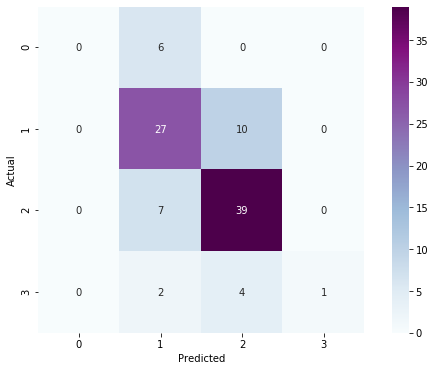

In [24]:
plt.figure(figsize=(10,6))
seaborn.heatmap(cm, annot =True, cmap ="BuPu", square =True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

##### **Cross validating to get the general performance**

In [25]:
cv_score = cross_val_score(clf_dtree, X_train, y= y_train, cv=4, n_jobs= -1)

In [26]:
cv_score.mean()

0.7447916666666666

### 2. *SGD Classifier*

In [27]:
sc = StandardScaler()

In [28]:
X = sc.fit_transform(X)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2,shuffle= True)

In [30]:
from sklearn.linear_model import SGDClassifier
sgd_classie = SGDClassifier(loss ="hinge", penalty ="l2")

In [31]:
sgd_classie.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [32]:
sgd_classie.score(X_test, y_test)

0.7395833333333334

In [33]:
cv_score = cross_val_score(sgd_classie, X_train, y_train, cv =10, n_jobs = -1)

In [34]:
cv_score.mean()

0.7939271255060728

### 3. *KNN Classifier*

In [35]:
from mlxtend.plotting import plot_decision_regions
from sklearn.neighbors import KNeighborsClassifier

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state = 2)

In [37]:
y.shape

(480,)

In [38]:
knn_classie = KNeighborsClassifier(n_neighbors = 5, n_jobs =-1)

In [39]:
knn_classie.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [40]:
y_pred_knn = knn_classie.predict(X_test)
y_pred_knn[:10]

array([2, 2, 2, 1, 1, 2, 1, 2, 2, 2])

In [41]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_knn

0.8541666666666666

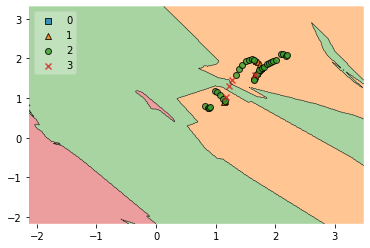

In [42]:
value = 1.5
width = 0.75

fig, ax = plt.subplots()
plot_decision_regions(X, y, clf = knn_classie, filler_feature_values = {2:value, 3:value},
                     filler_feature_ranges ={2:width, 3:width}, res =0.02, legend =2, ax = ax)
plt.show()

### 4. *Support Vector Classifier*

In [43]:
from sklearn.svm import SVC

In [44]:
svm_classie = SVC(gamma ='auto')

In [45]:
svm_classie.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [46]:
y_pred_svm = svm_classie.predict(X_test)

In [47]:
acc_svm = accuracy_score(y_test, y_pred_svm)
acc_svm

0.8194444444444444

### 5. *Ridge Classifier*

In [48]:
from sklearn.linear_model import RidgeClassifier

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state = 0)

In [50]:
rid_classie = RidgeClassifier()

In [51]:
rid_classie.fit(X_train, y_train)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)

In [52]:
y_pred_rid = rid_classie.predict(X_test)
y_pred_rid

array([1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1,
       2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2,
       1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2,
       1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2])

In [53]:
acc_rid = accuracy_score(y_test, y_pred_rid)

In [54]:
acc_rid*100

85.41666666666666

###  ***Using the trained models on PNB dataset***

In [55]:
df_pnb = pd.read_csv("stock_data/PNB.csv")
df_pnb.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,PNB,EQ,15-May-2017,169.15,169.95,171.30,166.2,166.85,166.80,168.94,7476618,1.263123e+09,41641,1352589,18.09
1,PNB,EQ,16-May-2017,166.80,167.35,178.00,164.8,173.20,174.15,173.13,51532461,8.921904e+09,254027,5804867,11.26
2,PNB,EQ,17-May-2017,174.15,173.00,173.10,164.3,164.80,165.05,167.27,26536944,4.438942e+09,116512,7037498,26.52
3,PNB,EQ,18-May-2017,165.05,163.40,164.40,157.9,158.25,158.50,161.06,13905573,2.239613e+09,76746,3245443,23.34
4,PNB,EQ,19-May-2017,158.50,159.50,162.25,154.1,155.20,155.20,157.59,16311602,2.570540e+09,82394,2816963,17.27


In [56]:
df_pnb['Middle_band'] = df_pnb['Close Price'].rolling(14).mean()

In [57]:
df_pnb['Lower_band'] = df_pnb['Middle_band'] - 2*df_pnb['Close Price'].rolling(14).std()

In [58]:
df_pnb['Upper_band'] = df_pnb['Middle_band'] + 2*df_pnb['Close Price'].rolling(14).std()

In [59]:
df_pnb['Call'] = df_pnb.apply(lambda row: call_value(row['Close Price'], row['Upper_band'], row['Middle_band'], row['Lower_band']), axis =1)

In [60]:
df_pnb[10:]

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Middle_band,Lower_band,Upper_band,Call
10,PNB,EQ,29-May-2017,150.65,150.45,151.85,143.05,143.65,145.10,147.58,8154328,1.203407e+09,37624,1838845,22.55,NaN,NaN,NaN,None
11,PNB,EQ,30-May-2017,145.10,143.90,148.00,142.40,146.45,146.35,146.11,10767305,1.573237e+09,46802,2178803,20.24,NaN,NaN,NaN,None
12,PNB,EQ,31-May-2017,146.35,146.85,151.60,145.00,150.85,150.50,148.56,16851657,2.503432e+09,62225,5241274,31.10,NaN,NaN,NaN,None
13,PNB,EQ,01-Jun-2017,150.50,151.00,152.30,149.25,151.60,151.90,150.95,9103808,1.374191e+09,39672,969143,10.65,154.503571,137.344790,171.662353,Hold Buy/ Liquidate short
14,PNB,EQ,02-Jun-2017,151.90,153.40,154.05,150.90,153.00,153.05,152.87,7997880,1.222654e+09,37217,1520732,19.01,153.521429,137.888292,169.154565,Hold Buy/ Liquidate short
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,PNB,EQ,07-May-2019,86.25,86.70,87.15,83.40,84.05,83.95,85.62,16356567,1.400418e+09,37679,2333933,14.27,88.250000,82.004017,94.495983,Hold Buy/ Liquidate short
490,PNB,EQ,08-May-2019,83.95,83.75,85.40,83.25,84.05,83.95,84.43,23380690,1.974095e+09,52244,2674859,11.44,87.578571,81.683108,93.474034,Hold Buy/ Liquidate short
491,PNB,EQ,09-May-2019,83.95,84.10,85.35,82.80,84.50,84.25,84.30,22934344,1.933317e+09,44704,2025433,8.83,86.892857,81.989976,91.795738,Hold Buy/ Liquidate short
492,PNB,EQ,10-May-2019,84.25,85.00,87.25,84.40,86.00,86.25,85.53,21821500,1.866353e+09,44879,1950720,8.94,86.425000,82.891479,89.958521,Hold Buy/ Liquidate short


In [61]:
X = df_pnb[['Middle_band', 'Upper_band', 'Lower_band', 'Close Price']].values[13:]

###### As the training data is different so the accuracy for new test data is small.

### Predicting the Call value for PNB Bank Using Ridge classifier

In [62]:
y_pred_pnb = rid_classie.predict(X)

In [63]:
df_pnb['Call'][13:] = label.inverse_transform(y_pred_pnb)
df_pnb[10:]

/home/keshu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Middle_band,Lower_band,Upper_band,Call
10,PNB,EQ,29-May-2017,150.65,150.45,151.85,143.05,143.65,145.10,147.58,8154328,1.203407e+09,37624,1838845,22.55,NaN,NaN,NaN,None
11,PNB,EQ,30-May-2017,145.10,143.90,148.00,142.40,146.45,146.35,146.11,10767305,1.573237e+09,46802,2178803,20.24,NaN,NaN,NaN,None
12,PNB,EQ,31-May-2017,146.35,146.85,151.60,145.00,150.85,150.50,148.56,16851657,2.503432e+09,62225,5241274,31.10,NaN,NaN,NaN,None
13,PNB,EQ,01-Jun-2017,150.50,151.00,152.30,149.25,151.60,151.90,150.95,9103808,1.374191e+09,39672,969143,10.65,154.503571,137.344790,171.662353,Hold Buy/ Liquidate short
14,PNB,EQ,02-Jun-2017,151.90,153.40,154.05,150.90,153.00,153.05,152.87,7997880,1.222654e+09,37217,1520732,19.01,153.521429,137.888292,169.154565,Hold Short/ Liquidate Buy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,PNB,EQ,07-May-2019,86.25,86.70,87.15,83.40,84.05,83.95,85.62,16356567,1.400418e+09,37679,2333933,14.27,88.250000,82.004017,94.495983,Hold Buy/ Liquidate short
490,PNB,EQ,08-May-2019,83.95,83.75,85.40,83.25,84.05,83.95,84.43,23380690,1.974095e+09,52244,2674859,11.44,87.578571,81.683108,93.474034,Hold Buy/ Liquidate short
491,PNB,EQ,09-May-2019,83.95,84.10,85.35,82.80,84.50,84.25,84.30,22934344,1.933317e+09,44704,2025433,8.83,86.892857,81.989976,91.795738,Hold Buy/ Liquidate short
492,PNB,EQ,10-May-2019,84.25,85.00,87.25,84.40,86.00,86.25,85.53,21821500,1.866353e+09,44879,1950720,8.94,86.425000,82.891479,89.958521,Hold Short/ Liquidate Buy


## 4.2 Now, we'll again utilize classification to make a trade call, and measure the efficiency of our trading algorithm over the past two years. For this assignment , we will use RandomForest classifier.

    Import the stock data file of your choice
    Define 4 new columns , whose values are:
    % change between Open and Close price for the day
    % change between Low and High price for the day
    5 day rolling mean of the day to day % change in Close Price
    5 day rolling std of the day to day % change in Close Price
    
    
    Create a new column 'Action' whose values are:
    1 if next day's price(Close) is greater than present day's.
    (-1) if next day's price(Close) is less than present day's.
    i.e. Action [ i ] = 1 if Close[ i+1 ] > Close[ i ]
    i.e. Action [ i ] = (-1) if Close[ i+1 ] < Close[ i ]
    
    
    Construct a classification model with the 4 new inputs and 'Action' as target
    
    
    Check the accuracy of this model , also , plot the net cumulative returns (in %) if we were to follow this algorithmic model


In [64]:
df

,Date,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Day_Perc_Change,Trend,Middle_band,Std_14,Upper_band,Lower_band,Call
0,2017-05-16,AXISBANK,EQ,500.10,502.10,504.50,493.50,502.05,501.50,499.85,...,101028,4027982,46.78,0.279944,Slight or No change,NaN,NaN,NaN,NaN,None
1,2017-05-17,AXISBANK,EQ,501.50,501.35,506.75,498.50,502.00,502.80,502.88,...,84189,2876528,44.64,0.259222,Slight or No change,NaN,NaN,NaN,NaN,None
2,2017-05-18,AXISBANK,EQ,502.80,498.00,499.10,490.25,492.85,492.00,494.96,...,95624,5348691,57.97,-2.147971,Negative,NaN,NaN,NaN,NaN,None
3,2017-05-19,AXISBANK,EQ,492.00,495.75,503.85,494.20,501.90,501.70,499.10,...,72985,4190505,55.06,1.971545,Positive,NaN,NaN,NaN,NaN,None
4,2017-05-22,AXISBANK,EQ,501.70,504.00,507.45,499.50,502.00,502.30,503.00,...,62027,2665857,53.63,0.119593,Slight or No change,NaN,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,2019-05-07,AXISBANK,EQ,747.45,751.85,755.50,740.00,744.85,741.85,748.48,...,141094,2404026,47.40,-0.749214,Slight negative,756.978571,9.724290,776.427151,737.529992,Hold Buy/ Liquidate short
489,2019-05-08,AXISBANK,EQ,741.85,741.90,744.75,733.35,735.10,735.50,737.58,...,118950,3373685,50.06,-0.855968,Slight negative,754.917857,11.013429,776.944715,732.890999,Hold Buy/ Liquidate short
490,2019-05-09,AXISBANK,EQ,735.50,733.90,740.50,729.40,732.35,731.00,734.60,...,75621,1409191,33.60,-0.611829,Slight negative,752.642857,12.445355,777.533568,727.752147,Hold Buy/ Liquidate short
491,2019-05-10,AXISBANK,EQ,731.00,734.40,738.50,729.50,732.55,735.05,735.71,...,114875,1569735,40.11,0.554036,Slight positive,750.067857,12.056097,774.180050,725.955664,Hold Buy/ Liquidate short


In [65]:
perc_change_open_close = (df['Close Price'].values/ df['Open Price'].values-1)*100

In [66]:
perc_change_low_high = (df['High Price'].values/df['Low Price'].values -1)*100

In [67]:
perc_change_close_mean = df['Close Price'].rolling(5).mean()

In [68]:
perc_change_close_std = df['Close Price'].rolling(5).std()

In [69]:
df['perc_change_open_close'] = perc_change_open_close
df['perc_change_low_high'] = perc_change_low_high
df['5_mean'] = perc_change_close_mean
df['5_std'] = perc_change_close_std

In [70]:
df.head()

,Date,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,Trend,Middle_band,Std_14,Upper_band,Lower_band,Call,perc_change_open_close,perc_change_low_high,5_mean,5_std
0,2017-05-16,AXISBANK,EQ,500.1,502.10,504.50,493.50,502.05,501.5,499.85,...,Slight or No change,NaN,NaN,NaN,NaN,None,-0.119498,2.228977,NaN,NaN
1,2017-05-17,AXISBANK,EQ,501.5,501.35,506.75,498.50,502.00,502.8,502.88,...,Slight or No change,NaN,NaN,NaN,NaN,None,0.289219,1.654965,NaN,NaN
2,2017-05-18,AXISBANK,EQ,502.8,498.00,499.10,490.25,492.85,492.0,494.96,...,Negative,NaN,NaN,NaN,NaN,None,-1.204819,1.805201,NaN,NaN
3,2017-05-19,AXISBANK,EQ,492.0,495.75,503.85,494.20,501.90,501.7,499.10,...,Positive,NaN,NaN,NaN,NaN,None,1.200202,1.952651,NaN,NaN
4,2017-05-22,AXISBANK,EQ,501.7,504.00,507.45,499.50,502.00,502.3,503.00,...,Slight or No change,NaN,NaN,NaN,NaN,None,-0.337302,1.591592,500.06,4.534644


In [71]:
def Action(data):
    action =[]
    for i in range(len(data)-1):
        if data['Close Price'][i+1] > data['Close Price'][i]:
            action.append(1)
            
        else:
            action.append(-1)
            
    return action

In [72]:
df['Action'] = Action(df) + ['NA']

**As the last row won't have the Action column data and the first 4 rows due to rolling Avg.**

In [73]:
X = df[['perc_change_open_close', 'perc_change_low_high', '5_mean', '5_std']].values[4:-1]

In [74]:
y = df.Action.values[4:-1]

Feature Scaling doesn't affect the efficiency in tree based models

X = scaler.fit_transform(X)

In [75]:
y = label.fit_transform(y)

#####  splitting the data-

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle =True)

#### RandomForest Classifier

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report

In [78]:
rfc_classie = RandomForestClassifier(n_estimators = 1000, max_depth =10 ,min_samples_split =2,
                                     max_features='auto', min_samples_leaf= 1)

In [79]:
rfc_classie.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [80]:
y_pred = rfc_classie.predict(X_test)

In [81]:
print("Accuracy score ", accuracy_score(y_test, y_pred))

Accuracy score  0.5327868852459017


In [82]:
cf = confusion_matrix(y_test, y_pred)

Text(184.92000000000007, 0.5, 'Truth')

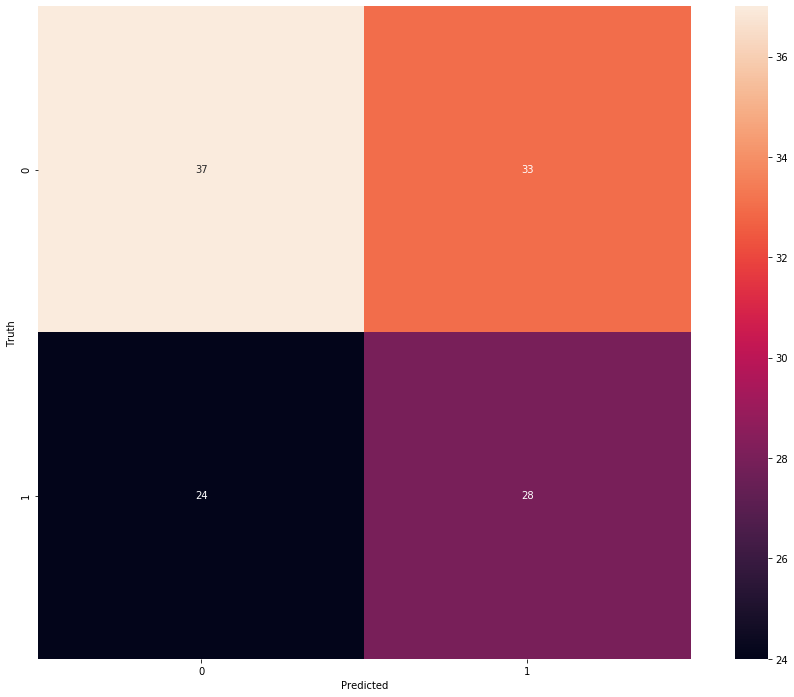

In [83]:
%matplotlib inline
plt.figure(figsize =(16,12))
seaborn.heatmap(cf, annot =True, square =True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### Hyperparameter Tuning

In [84]:
rfc = RandomForestClassifier()

In [85]:
# random parameters
n_estimators =[30,60,120,240,300,450,550,670]

# number of features at every split
max_features = ['auto', 'sqrt']

max_depth = [7,8,9,10,12,14,15]

# random grid
random_grid ={'n_estimators':n_estimators,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_leaf':[1,2,4,5,6,7]}

In [86]:
rfc_random = RandomizedSearchCV(estimator =rfc, param_distributions= random_grid, cv =  10, scoring = 'accuracy',
                            n_iter=10, n_jobs=-1)

rfc_random.fit(X_train, y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [87]:
rfc_random.best_params_

{'n_estimators': 60,
 'min_samples_leaf': 6,
 'max_features': 'sqrt',
 'max_depth': 8}

In [88]:
rfc_random.best_score_

0.5112612612612613

In [89]:
tuned_rfc = RandomForestClassifier(n_estimators = 670, max_features ='auto', max_depth =12, min_samples_leaf=4)
tuned_rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=670,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [90]:
y_pred_tuned = tuned_rfc.predict(X_test)

In [91]:
accuracy_score(y_test, y_pred_tuned)

0.5491803278688525

This low accuracy can be attributed to the fact that random forest is an ensemble type model and we have a very small dataset to train it. Thus, even after parameter tuning, the result couldn't cross 60% accuracy

In [92]:
cf_tuned = confusion_matrix(y_test, y_pred)

In [93]:
cf = cross_val_score(tuned_rfc, X_train, y =y_train, cv =10, n_jobs =-1)
cf.mean()

0.4976726726726727

#### Cumulative % returm

In [94]:
df[:10]

,Date,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,Middle_band,Std_14,Upper_band,Lower_band,Call,perc_change_open_close,perc_change_low_high,5_mean,5_std,Action
0,2017-05-16,AXISBANK,EQ,500.10,502.10,504.50,493.50,502.05,501.50,499.85,...,NaN,NaN,NaN,NaN,None,-0.119498,2.228977,NaN,NaN,1
1,2017-05-17,AXISBANK,EQ,501.50,501.35,506.75,498.50,502.00,502.80,502.88,...,NaN,NaN,NaN,NaN,None,0.289219,1.654965,NaN,NaN,-1
2,2017-05-18,AXISBANK,EQ,502.80,498.00,499.10,490.25,492.85,492.00,494.96,...,NaN,NaN,NaN,NaN,None,-1.204819,1.805201,NaN,NaN,1
3,2017-05-19,AXISBANK,EQ,492.00,495.75,503.85,494.20,501.90,501.70,499.10,...,NaN,NaN,NaN,NaN,None,1.200202,1.952651,NaN,NaN,1
4,2017-05-22,AXISBANK,EQ,501.70,504.00,507.45,499.50,502.00,502.30,503.00,...,NaN,NaN,NaN,NaN,None,-0.337302,1.591592,500.06,4.534644,-1
5,2017-05-23,AXISBANK,EQ,502.30,502.25,506.10,495.20,500.50,500.60,500.17,...,NaN,NaN,NaN,NaN,None,-0.328522,2.201131,499.88,4.480737,-1
6,2017-05-24,AXISBANK,EQ,500.60,503.00,505.00,495.00,499.65,499.30,498.39,...,NaN,NaN,NaN,NaN,None,-0.735586,2.020202,499.18,4.173368,1
7,2017-05-25,AXISBANK,EQ,499.30,502.00,509.90,495.85,507.85,507.45,504.39,...,NaN,NaN,NaN,NaN,None,1.085657,2.833518,502.27,3.113198,1
8,2017-05-26,AXISBANK,EQ,507.45,508.00,513.00,505.00,510.50,511.45,508.86,...,NaN,NaN,NaN,NaN,None,0.679134,1.584158,504.22,5.091733,-1
9,2017-05-29,AXISBANK,EQ,511.45,511.90,515.00,502.20,507.45,507.25,507.58,...,NaN,NaN,NaN,NaN,None,-0.908381,2.548785,505.21,5.106295,1


In [95]:
pred_actions = tuned_rfc.predict(X)

In [96]:
pred_actions = [d if d==1 else -1 for d in pred_actions]

In [97]:
df['pred_actions'] = (['NA']*4 + pred_actions + ['NA'])

$ cumulative = (current price - original price)/original price $

In [98]:
day_wise_returns =(df['Close Price'].values[5:]/ df['Close Price'].values[5]-1)

In [99]:
day_wise_returns[:10]

array([ 0.        , -0.00259688,  0.01368358,  0.02167399,  0.01328406,
        0.02756692,  0.02686776,  0.01737915,  0.01488214,  0.02606872])

In [100]:
day_wise_returns = list(day_wise_returns)

In [101]:
df['day_wise_returns'] = ([0]*4 + day_wise_returns +[0])

In [102]:
algo_cumulative_returns = df.pred_actions.values[4:-1] * df.day_wise_returns.values[4:-1]

In [103]:
len(algo_cumulative_returns)

488

In [104]:
algo_cumulative_returns = [0]*4 + list(algo_cumulative_returns) + [0]

In [105]:
len(algo_cumulative_returns)

493

In [106]:
df['algo_cumulative_returns'] = algo_cumulative_returns

In [109]:
df['algo_cumulative_returns'] = df['algo_cumulative_returns'].cumsum()

Text(0, 0.5, 'Returns')

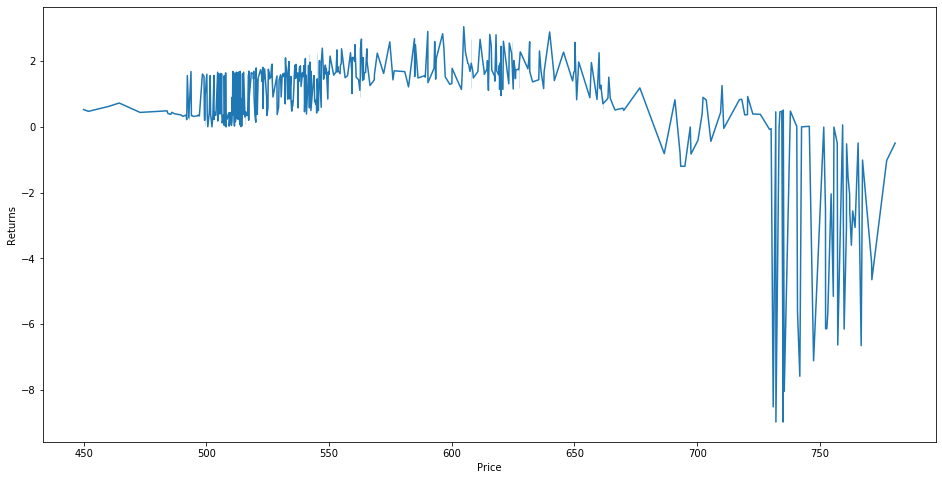

In [110]:
plt.figure(figsize =(16,8))
seaborn.lineplot(y = df.algo_cumulative_returns.values[4:], x = df['Close Price'].values[4:], data =df)
plt.xlabel("Price")
plt.ylabel("Returns")